In [79]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 
from numpy.polynomial import Polynomial
sns.set()

In [138]:
def simulate_brownian_paths(r0: float, mu: float, sigma: float, T: float, n_steps: int, n_paths:int):
    Z = np.random.normal(loc=0.0, scale=1.0, size=(n_paths, n_steps))
    Z[:, 0] = 0.0
    Z = Z.cumsum(axis=1)
    dt = T/n_steps
    t = np.linspace(start=0.0, stop=T, num=n_steps)
    paths = r0*np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * Z).T/np.exp((mu - sigma ** 2 / 2) * dt)
    return pd.DataFrame(paths, index=t)

In [139]:
if __name__ == '__main__':

    n_paths = 1000
    n_steps = 50
    sigma = 0.15
    rfr = 0.03
    S0 = 100.0
    T = 5.0
    strike = 50.0
    dt = T/n_steps
    option_type = 'call'
    mult = 1.0 if option_type == "call" else -1.0

    gbm = simulate_brownian_paths(r0=S0, mu=rfr, sigma=sigma, T=T, n_steps=n_steps, n_paths=n_paths) 
    

    h = np.maximum(gbm - strike, 0).values
    C = np.zeros_like(gbm)
    V = np.zeros_like(gbm)
    deg=5

    
    for i in range(-1, -n_steps, -1):
        if i == -1:
            V[i, :] = h[i, :]
        else:
            itm = h[i, :] > 0
            X = gbm.iloc[i, itm]
            Y = V[i + 1, itm] *np.exp(-rfr*dt)
            reg = make_pipeline(PolynomialFeatures(degree=deg),LinearRegression()).fit(X=X.ravel().reshape(-1, 1),y=Y.ravel().reshape(-1, 1))
            C[i, :] = reg.predict(X=gbm.iloc[i, :].ravel().reshape(-1, 1)).ravel()
            V[i, :] = np.maximum(h[i, :], C[i, :])
    V[0, :] = V[1, :].mean()

    d1 = (np.log(S0 / strike) + (rfr + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    bs_price = norm.cdf(d1) * S0 - norm.cdf(d2) * strike * np.exp(-rfr * T)

    print(f"American Call Price: {V[0, 0]:.4f}")
    print(f"European Call Price: {bs_price:.4f}") 
    
    

American Call Price: 51.8077
European Call Price: 57.0064


In [140]:
V=pd.DataFrame(V)
V

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,...,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735,51.807735
1,49.626644,54.569482,59.740463,46.245686,55.613941,44.440377,52.759826,50.265450,55.354817,58.445977,...,56.303773,55.186200,54.198638,57.518445,47.709642,54.565439,52.474758,51.125771,58.506327,47.222054
2,46.513592,48.597189,62.006684,42.114577,51.243634,41.808496,52.023828,63.052681,49.193132,61.961798,...,59.280226,51.384506,54.233322,55.090258,45.028508,49.374914,52.212517,53.009183,58.262016,45.343089
3,39.848739,46.840135,62.599677,42.019047,58.456467,52.165457,50.648688,59.428646,50.313959,52.951005,...,62.601962,69.673009,47.898757,46.497881,42.678954,48.197211,50.356084,60.405225,56.950328,44.214505
4,37.592660,37.922856,50.245818,41.296217,59.136264,52.280498,51.470455,60.844466,50.700710,54.403552,...,71.027936,66.972394,47.990075,52.665828,42.690123,50.837032,51.502551,63.217842,59.241023,47.200205
5,46.178648,41.860888,52.713146,45.526917,65.859476,48.747189,46.325842,63.333955,49.718423,51.867745,...,70.367991,75.093424,44.880161,46.000583,42.660696,47.557794,58.775042,67.793675,61.425398,46.117154
6,45.915128,40.593214,44.050223,49.022805,72.085046,53.836888,42.280778,64.807931,53.255645,50.784862,...,75.548602,61.067801,50.867352,46.310359,36.382046,45.804007,56.495434,69.472671,64.536441,48.287138
7,39.800060,38.075644,41.578988,50.935969,79.617776,44.745093,34.611555,81.758047,51.174969,50.322061,...,78.770716,61.296786,46.164411,42.383148,39.857609,41.712366,58.571230,58.772884,69.359928,49.171654
8,33.180120,33.548380,47.142564,48.022565,92.090655,44.490024,43.729686,81.908984,49.206740,47.810724,...,74.277650,57.880553,40.374262,42.672277,38.188565,41.170135,57.865573,63.917851,86.109765,52.213079
9,29.689706,35.265791,46.489506,49.525014,87.405768,46.447447,55.392598,83.548570,45.445189,43.716201,...,66.153928,60.088253,36.267520,46.201181,35.670942,48.827895,61.595981,71.806346,84.800428,45.374699


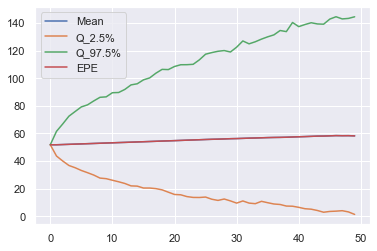

In [143]:
if __name__ == '__main__': 
    V=pd.DataFrame(V) 
    q_low=[] 
    q_up=[] 
    me=[] 
    EPE=[]
    i=0
    while i<n_steps: 
        q_low.append(V.iloc[i,:].quantile(0.025))
        q_up.append(V.iloc[i,:].quantile(0.975)) 
        me.append(V.iloc[i,:].mean())
        EPE.append(np.maximum(V.iloc[i,:],0).mean())
        i+=1
  
    df = pd.DataFrame.from_dict({'Mean': me,
                                 'Q_2.5%': q_low,
                                 'Q_97.5%': q_up,
                                  'EPE': EPE
                                 })
    df.plot()
    plt.show()